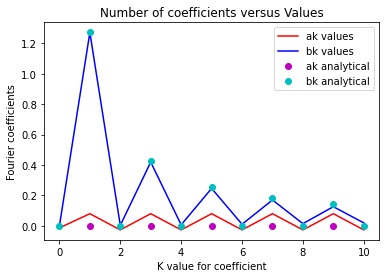

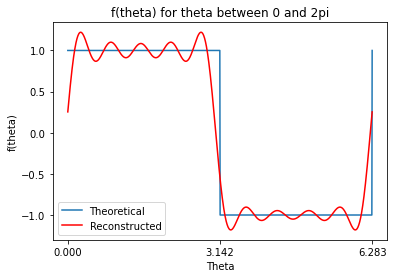

In [29]:
'Assignment 4 part 1a-c'
import matplotlib.pylab as plt
import math
import numpy as np
from scipy import signal


# Copy here the simpson integration function done in class
#def simpson(fun,a,b,n):
def f(x):
    # remember: functions need a return.
    return np.exp(x)


def simpson(fun, a, b, n):
    h = (b-a)/float(n)
    
    x0 = a
    xn = b
    
    y0 = fun(x0)
    yn = fun(xn)
    
    # sum over even indexes of x and sum over odd indexes of x
    feven = 0.0
    fodd = 0.0
    
    for j in range(2,n,2):
        #print(j)
        xeven = a + j*h
        feven += fun(xeven)
        
        xodd = a + (j-1)*h
        fodd += fun(xodd)
        
    # range method above does not include the last odd term
    xodd = a + (n-1)*h
    fodd += fun(xodd)
    
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# integration test


#Int_simp = simpson(f, a, b, n)

#Int_analytical = math.exp(1.0) - 1.0

#error = abs(Int_analytical - Int_simp)

#print('The simpson value is:', Int_simp, 'The analytical value is:', Int_analytical, 'The error is:', error)

#for n = 50:   1.71828 18299 86334 1.718281828459045 1.527288961966633e-09
# for n = 100: 1.71828 18285 545043 1.718281828459045 9.545919610332021e-11
#e - 1 =       1.71828 18284 59045 (from https://www.math.utah.edu/~pa/math/e.html) 


# Define parameters for the problem (omega = 1 and T is the period)
omega = 1
T = 2*math.pi/omega

# limits of the integration
a = 0
b = T

# number of points to calculate the integral (50 integration elements may be sufficient)
n = 50

# Number of coefficients to be calculated (set up to 10 coefficients for now) AKA k_max
nc = 10

# define the function that will be expanded in terms of Fourier series
#we used the commented function for testing but the analytical solution is for part c 
def function(t):
    return(signal.square(omega*t,duty = 0.5))#(math.sin(omega*t)+ 3 * math.sin(3*omega*t) + 5*math.sin(5*omega*t))



# calculate the coefficient a_0 first! That is just integrating the function directly over the interval [a,b]
a_0 = 1/T*simpson(function, a, b, n)

k = 1
# Initiate lists that will store all Fourier coeffcients (k=0 and k>0). 
# But we can store already our a0 coefficient on the list.
a_manual_list = [a_0]
b_manual_list = [0.0]
a_analytical = []
b_analytical =[0.0]
# define functions that will calculate all other coefficients
def fak(t):
    return(function(t)*math.cos(k*omega*t))



def fbk(t):
    return(function(t)*math.sin(k*omega*t))

# All functions defined above are 'idle'. We are now going to loop over the coefficients components
# to calculate all other coefficients from k=1 upt to k=nc. Just use a simple for-loop for that.
# for-loop over number of coefficients
k_list=[0]
k_odd_list=[]

f_t_list=[0.0]
#function used to check if a number is odd
def odd(num):
    if (num%2) != 0:
        return num

for k in range(1,nc+1):
    if k == odd(k):
        a_analytical.append(0.0)
        b_analytical.append(4/math.pi/k)
        k_odd_list.append(k)
    elif k != odd(k):
        b_analytical.append(0.0)
        
    a_k = 2/T*simpson(fak, a, b, n)
    b_k = 2/T*simpson(fbk, a, b, n)

    a_manual_list.append(a_k)
    b_manual_list.append(b_k)
    k_list.append(k)


# After the loop is completed and new coefficients are appended on the lists, 
# add plot instructions that will make a graphic for a_k and b_k versus k in the same panel.
#print(k_list,a_manual_list,b_manual_list)
plt.plot(k_list,a_manual_list,'r', label='ak values')
plt.plot(k_list,b_manual_list,'b', label='bk values')
plt.plot(k_odd_list,a_analytical,'mo',label='ak analytical')
plt.plot(k_list,b_analytical,'co',label='bk analytical')
plt.title('Number of coefficients versus Values')
plt.xlabel('K value for coefficient')
plt.ylabel('Fourier coefficients')
plt.legend(loc='upper right')
plt.show()


ft = []
t = np.linspace(0,2*math.pi,1000,endpoint = True)
for i in t:
    ft_sum = 0
    for k in range(1,nc+1):
        a_k = a_manual_list[k]
        b_k = b_manual_list[k]
        ft_sum = ft_sum + a_k*math.cos(k*omega*i) + b_k*math.sin(k*omega*i)
        
    ft.append(ft_sum+a_0)
       
x_ticks = [0,math.pi,2*math.pi]
plt.plot(omega*t,signal.square(t),label = 'Theoretical')
plt.plot(omega*t,ft,'r',label = 'Reconstructed')
plt.title('f(theta) for theta between 0 and 2pi')
plt.xlabel('Theta')
plt.ylabel('f(theta)')
plt.xticks(x_ticks)
plt.legend(loc = 'lower left')
plt.show()

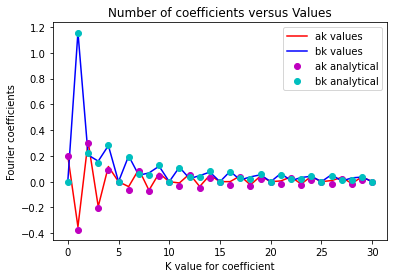

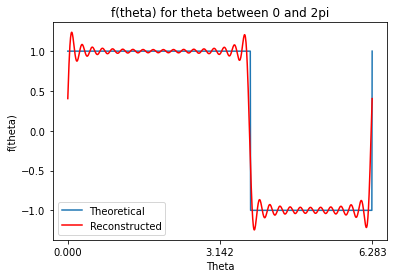

In [28]:
'1 d'
import matplotlib.pylab as plt
import math
import numpy as np
from scipy import signal


# Copy here the simpson integration function done in class
#def simpson(fun,a,b,n):
def f(x):
    # remember: functions need a return.
    return np.exp(x)


def simpson(fun, a, b, n):
    h = (b-a)/float(n)
    
    x0 = a
    xn = b
    
    y0 = fun(x0)
    yn = fun(xn)
    
    # sum over even indexes of x and sum over odd indexes of x
    feven = 0.0
    fodd = 0.0
    
    for j in range(2,n,2):
        #print(j)
        xeven = a + j*h
        feven += fun(xeven)
        
        xodd = a + (j-1)*h
        fodd += fun(xodd)
        
    # range method above does not include the last odd term
    xodd = a + (n-1)*h
    fodd += fun(xodd)
    
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# integration test


#Int_simp = simpson(f, a, b, n)

#Int_analytical = math.exp(1.0) - 1.0

#error = abs(Int_analytical - Int_simp)

#print('The simpson value is:', Int_simp, 'The analytical value is:', Int_analytical, 'The error is:', error)

#for n = 50:   1.71828 18299 86334 1.718281828459045 1.527288961966633e-09
# for n = 100: 1.71828 18285 545043 1.718281828459045 9.545919610332021e-11
#e - 1 =       1.71828 18284 59045 (from https://www.math.utah.edu/~pa/math/e.html) 


# Define parameters for the problem (omega = 1 and T is the period)
omega = 1
T = 2*math.pi/omega
duty = .6
# limits of the integration
a = 0
b = T
alpha = 1.0/duty 
tau = 1
# number of points to calculate the integral (50 integration elements may be sufficient)
n = 100

# Number of coefficients to be calculated (set up to 10 coefficients for now) AKA k_max
nc = 30

# define the function that will be expanded in terms of Fourier series
def function(t):
    return(signal.square(omega*t,duty = duty))#(math.sin(omega*t)+ 3 * math.sin(3*omega*t) + 5*math.sin(5*omega*t))



# calculate the coefficient a_0 first! That is just integrating the function directly over the interval [a,b]
a_0 = 1/T*simpson(function, a, b, n)

k = 1
# Initiate lists that will store all Fourier coeffcients (k=0 and k>0). 
# But we can store already our a0 coefficient on the list.
a_manual_list = [a_0]
b_manual_list = [0.0]
a_analytical = [a_0]
b_analytical =[0.0]
# define functions that will calculate all other coefficients
def fak(t):
    return(function(t)*math.cos(k*omega*t))



def fbk(t):
    return(function(t)*math.sin(k*omega*t))

# All functions defined above are 'idle'. We are now going to loop over the coefficients components
# to calculate all other coefficients from k=1 upt to k=nc. Just use a simple for-loop for that.
# for-loop over number of coefficients
k_list=[0]

f_t_list=[0.0]
#function used to check if a number is odd
def odd(num):
    if (num%2) != 0:
        return num

for k in range(1,nc+1):
    a_analytical.append(2/k/math.pi*math.sin(2*k*math.pi/alpha))  
    b_analytical.append(2/k/math.pi*(1-math.cos(2*k*math.pi/alpha)))
        
    a_k = 2/T*simpson(fak, a, b, n)
    b_k = 2/T*simpson(fbk, a, b, n)

    a_manual_list.append(a_k)
    b_manual_list.append(b_k)
    k_list.append(k)


# After the loop is completed and new coefficients are appended on the lists, 
# add plot instructions that will make a graphic for a_k and b_k versus k in the same panel.
#print(k_list,a_manual_list,b_manual_list)
plt.plot(k_list,a_manual_list,'r', label='ak values')
plt.plot(k_list,b_manual_list,'b', label='bk values')
plt.plot(k_list,a_analytical,'mo',label='ak analytical')
plt.plot(k_list,b_analytical,'co',label='bk analytical')
plt.title('Number of coefficients versus Values')
plt.xlabel('K value for coefficient')
plt.ylabel('Fourier coefficients')
plt.legend(loc='upper right')
plt.show()


ft = []
t = np.linspace(0,2*math.pi,1000,endpoint = True)
for i in t:
    ft_sum = 0
    for k in range(1,nc+1):
        a_k = a_manual_list[k]
        b_k = b_manual_list[k]
        ft_sum = ft_sum + a_k*math.cos(k*omega*i) + b_k*math.sin(k*omega*i)
        
    ft.append(ft_sum+a_0)
       
x_ticks = [0,math.pi,2*math.pi]
plt.plot(omega*t,function(t),label = 'Theoretical')
plt.plot(omega*t,ft,'r',label ='Reconstructed' )
plt.title('f(theta) for theta between 0 and 2pi')
plt.xlabel('Theta')
plt.ylabel('f(theta)')
plt.xticks(x_ticks)
plt.legend(loc='lower left')
plt.show()

The maximum dominant frequency of the signal is 0.225.


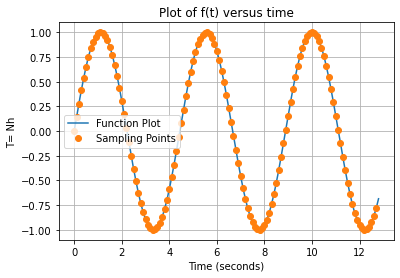

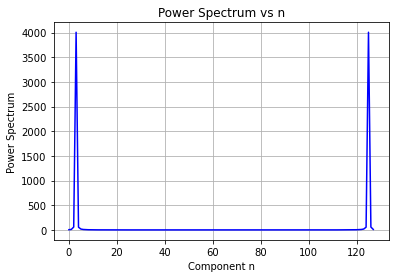

The computed dominant frequency is 0.234375 and the dominant Fourier component is at index 3.
The error within the dominant frequency is 4.166667%.


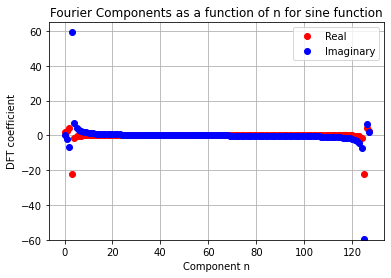

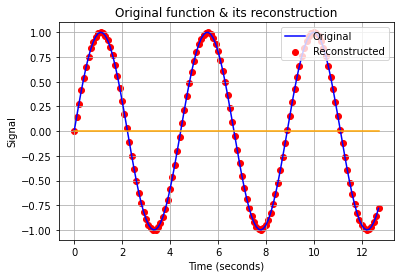

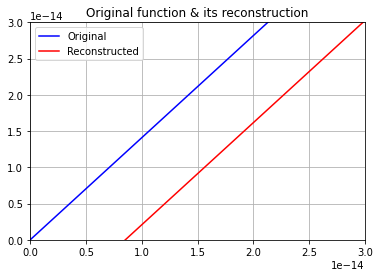

In [30]:
# Exercise 2a
import matplotlib.pylab as plt
import math
import numpy as np

# Input Function
def function(t):
    return np.sin(0.45*np.pi*t)

#Defining Constants and Definitions
N = 128
h = 0.1
tau = N * h

omega = 0.45 * math.pi
nu = omega/(2.0*math.pi)

print('The maximum dominant frequency of the signal is ' + str(nu) + '.')

#Original Signal
t = np.arange(0,tau,h)
signal = function(t)

#First Graph: Original Function and Sampling
tx=np.arange(0,tau,0.0001)
signalx=function(tx)

plt.plot(tx, signalx,label = 'Function Plot')
plt.plot(t, signal,'o', label = 'Sampling Points')
plt.title('Plot of f(t) versus time')
plt.xlabel('Time (seconds)')
plt.ylabel('T= Nh')
plt.legend()
plt.grid()
plt.show()

##############################

# Fourier Components
ind_list = []
real_list = []
imag_list = []

for n in range(N):
    real = 0
    imag = 0
    for m in range(N):
        real += signal[m] * math.cos((2*np.pi*m*n)/N)
        imag += signal[m] * math.sin((2*np.pi*m*n)/N)
    sum_f = real**2 + imag**2
    
    real_list.append(real)
    imag_list.append(imag)
    
    ind_list.append(sum_f)
    
# Convert Lists Into Arrays
ind_list = np.array(ind_list)
real_list = np.array(real_list)
imag_list = np.array(imag_list)

# Finding the Dominant Frequencies
# (Real)
d_real = max(real_list)
n_real = np.argmax(real_list)

# (Imaginary)
d_imag = max(imag_list)
n_imag = np.argmax(abs(imag_list))

# Here the program determines which of the lists has a higher max value for the reconstructed function.
if d_real >= d_imag:
    d_nu = n_real/(N*h)
    d_comp = n_real
    
#Second Graph : Power Spectrum
    plt.plot(range(N),ind_list, color='blue')
    plt.title('Power Spectrum vs n')
    plt.xlabel('Component n')
    plt.ylabel('Power Spectrum')
    plt.grid(True)
    plt.show()
    
else:
    d_freq = n_imag/(N*h)
    d_comp = n_imag
    plt.plot(range(N),ind_list, color='blue')
    plt.title('Power Spectrum vs n')
    plt.xlabel('Component n')
    plt.ylabel('Power Spectrum')
    plt.grid(True)
    plt.show()
#################################
    error = (abs(nu - d_freq) / nu) * 100

print('The computed dominant frequency is ' + str(d_freq)  , 'and the dominant Fourier component is at index '+ str(d_comp)+ '.')
print('The error within the dominant frequency is ' + "{:.6f}".format(error) + '%.')

# Reconstruction of Function
rec_f_list = []
rec_t_list = []
for n in range(N):
    cos_f = 0
    sin_f = 0
    rec_f = 0
    rec_t = 0
    for m in range(N):
        cos_f += real_list[m] * math.cos((2*np.pi*m*n)/N)
        sin_f += imag_list[m] * math.sin((2*np.pi*m*n)/N)
    
    rec_t = n * h
    rec_f += cos_f + sin_f
    
    rec_t_list.append(rec_t)
    rec_f_list.append(rec_f)
    
rec_f_list = np.array(rec_f_list)
f_list = (1/N) * rec_f_list

######## Other Graphs ########

#Third Graph : # Real and Imaginary Components
plt.plot(range(N),real_list,'ro', label='Real')
plt.plot(range(N),imag_list, 'bo', label='Imaginary')
plt.grid(True)
plt.xlabel('Component n')
plt.ylabel('DFT coefficient')
plt.ylim(-60,65)
plt.title('Fourier Components as a function of n for sine function')
plt.legend()
plt.show()

# Fourth Graph : Original Function and its reconstruction
plt.plot(rec_t_list, signal, color = 'blue', label = 'Original')
#plt.plot(t, f_list,color = 'red', label = 'Reconstructed')
plt.scatter(t, f_list, color ='red',label = 'Reconstructed' )
plt.plot(t, 0.0*t, color = 'orange')
plt.title('Original function & its reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()

#Fifth Graph: Demonstrates the deviation of the DFT
# I had to zoom in to a certain scale in order to observe a deviation of the reconstructed function from the original. 
plt.plot(rec_t_list, signal, color='blue', label='Original')
plt.plot(t, f_list, color='red', label='Reconstructed')
plt.title('Original function & its reconstruction')
plt.axis([0,0.00000000000003,0,0.00000000000003])
plt.legend()
plt.grid(True)
plt.show()


The maximum dominant frequency of the signal is 3.0.


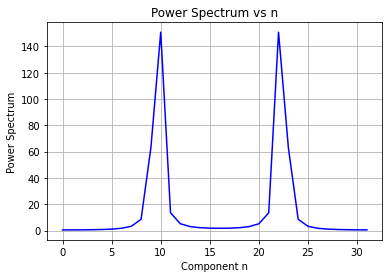

The computed dominant frequency is 3.125 and the dominant Fourier component is at index 10.
The error within the dominant frequency is 4.166667%.


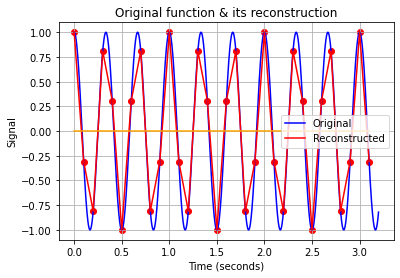

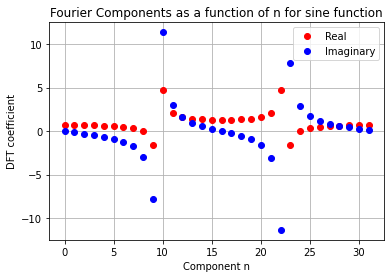

In [31]:
# Exercise 2a Continued
#Decreasing time spacing h = (0.6,0.5,0.4,0.3,0.2,0.1) and keeping N= 32 fixed

import matplotlib.pylab as plt
import math
import numpy as np

# Input Function
def function(t):
    return np.cos(6*np.pi*t)

#Defining Constants and Definitions
N = 32
h = 0.1
tau = N * h

omega = 6 * math.pi
nu = omega/(2.0*math.pi)

print('The maximum dominant frequency of the signal is ' + str(nu) + '.')

#Original Signal
time = np.arange(0,tau,h)
signal = function(time)

# Fourier Components
ind_list = []
real_list = []
imag_list = []

for n in range(N):
    real = 0
    imag = 0
    for m in range(N):
        real += signal[m] * math.cos((2*np.pi*m*n)/N)
        imag += signal[m] * math.sin((2*np.pi*m*n)/N)
    sum_f = real**2 + imag**2
    
    real_list.append(real)
    imag_list.append(imag)
    
    ind_list.append(sum_f)
    
# Convert Lists Into Arrays
ind_list = np.array(ind_list)
real_list = np.array(real_list)
imag_list = np.array(imag_list)

# Finding the Dominant Frequencies
# (Real)
d_real = max(real_list)
n_real = np.argmax(real_list)

# (Imaginary)
d_imag = max(imag_list)
n_imag = np.argmax(abs(imag_list))

# Here the program determines which of the lists has a higher max value for the reconstructed function.
if d_real >= d_imag:
    d_nu = n_real/(N*h)
    d_comp = n_real
    
#First Graph : Power Spectrum
    plt.plot(range(N),ind_list, color='blue')
    plt.title('Power Spectrum vs n')
    plt.xlabel('Component n')
    plt.ylabel('Power Spectrum')
    plt.grid(True)
    plt.show()
    
else:
    d_freq = n_imag/(N*h)
    d_comp = n_imag
    plt.plot(range(N),ind_list, color='blue')
    plt.title('Power Spectrum vs n')
    plt.xlabel('Component n')
    plt.ylabel('Power Spectrum')
    plt.grid(True)
    plt.show()
#################################
    error = (abs(nu - d_freq) / nu) * 100

print('The computed dominant frequency is ' + str(d_freq)  , 'and the dominant Fourier component is at index '+ str(d_comp)+ '.')
print('The error within the dominant frequency is ' + "{:.6f}".format(error) + '%.')

# Reconstruction of Function
rec_f_list = []
rec_t_list = []
for n in range(N):
    cos_f = 0
    sin_f = 0
    rec_f = 0
    rec_t = 0
    for m in range(N):
        cos_f += real_list[m] * math.cos((2*np.pi*m*n)/N)
        sin_f += imag_list[m] * math.sin((2*np.pi*m*n)/N)
    
    rec_t = n * h
    rec_f += cos_f + sin_f
    
    rec_t_list.append(rec_t)
    rec_f_list.append(rec_f)
    
rec_f_list = np.array(rec_f_list)
f_list = (1/N) * rec_f_list

######## Other Graphs ########
#Second Graph: Original Function and Sampling
orig_time = np.arange(0,tau, 0.001)
orig_sig = function(orig_time)

plt.plot(orig_time,orig_sig, color='blue', label='Original')
plt.plot(time, f_list,color='red', label='Reconstructed')
plt.scatter(time, f_list, color='red')
plt.plot(time, 0*time, color='orange')
plt.title('Original function & its reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()

#Third Graph : # Real and Imaginary Components
plt.plot(range(N),real_list,'ro', label='Real')
plt.plot(range(N),imag_list, 'bo', label='Imaginary')
plt.grid(True)
plt.xlabel('Component n')
plt.ylabel('DFT coefficient')
plt.title('Fourier Components as a function of n for sine function')
plt.legend()
plt.show()


In [32]:
# Exercise 2b

import matplotlib.pyplot as plt
import math
import numpy as np

# Extracting the Signal Data
sig = np.loadtxt("pitch.txt", float)

# Points
N = len(sig)

# Time Values
time = range(N)

#First Graph: Original Signal
plt.plot(time,sig)
plt.xlabel('Time (seconds)')
plt.ylabel('Signal')
plt.title('Plot of the original signal')
plt.show()
########################################

def f_real(n):
    f=0
    for m in range(N):
        f+= sig[m] * np.cos((2*np.pi*m*n)/N)
    return f
        
def f_imag(n):
    f=0
    for m in range(N):
        f+=sig[m] * np.sin((2*np.pi*m*n)/N)
    return f

# Fourier Components
ind_list = []
real_list = []
imag_list = []

for n in range (N):
    real_f = f_real(n)
    imag_f = f_imag(n)
    ind_f= real_f**2 +imag_f**2
    real_list.append(real_f)
    imag_list.append(imag_f)
    ind_list.append(ind_f)
    
# Convert Lists Into Arrays
ind_list = np.array(ind_list, float)
real_list = np.array(real_list, float)
imag_list = np.array(imag_list, float)


# Reconstruction of Function
rec_f_list = []
for n in range(N):
    cos_f = 0
    sin_f = 0
    rec_f = 0
    rec_t = 0
    for m in range(N):
        tem_cos_f = real_list[m] * np.cos((2*np.pi*m*n)/N)
        if abs(tem_cos_f) > 50:
            cos_f += tem_cos_f
        tem_sin_f = imag_list[m] * np.sin((2*np.pi*m*n)/N)
        if abs(tem_sin_f) > 50:
            sin_f += tem_sin_f
            
    rec_f += cos_f + sin_f
    rec_f_list.append(rec_f)
    
    
rec_f_list = np.array(rec_f_list)
f_list = (1/N) * rec_f_list   
    

    
######## Graphs ########
# Second Graph : Fourier Components
plt.plot(range(N),real_list, color='blue', label='Real')
plt.plot(range(N),imag_list, color='red', label='Imaginary')
plt.grid(True)
plt.xlabel('Component n')
plt.ylabel('DFT coefficient')
plt.title('Fourier Components as a function of n')
plt.legend()
plt.show()

# Third Graph : Power Spectrum
plt.plot(range(N),ind_list, color='blue')
plt.title('Power Spectrum')
plt.xlabel('n component')
plt.ylabel('Power spectrum')
plt.grid(True)
plt.show()

#Fourth Graph: Original Function and Reconstruction
plt.plot(time[0:260], sig[0:260], color='green', label='Original')
plt.plot(time[0:260], f_list[0:260], color='black', label='Reconstructed')
plt.title('Original signal & its reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



OSError: pitch.txt not found.